In [2]:
DATA_DIR = '../data'
MODEL_DIR = '../models'

In [3]:
import os

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
sns.set_palette('colorblind')

In [4]:
with open(os.path.join(DATA_DIR, 'marketing_campaign.xls'), 'rb') as f:
    df = pd.read_csv(f, sep='\t')
with open(os.path.join(MODEL_DIR, 'kmeans.pickle'), 'rb') as f:
    kmeans = pickle.load(f)
with open(os.path.join(MODEL_DIR, 'pca.pickle'), 'rb') as f:
    pca = pickle.load(f)
with open(os.path.join(MODEL_DIR, 'scaler.pickle'), 'rb') as f:
    scaler = pickle.load(f)

In [5]:
df.select_dtypes(include=['int64'])

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [31]:
df.select_dtypes(include='object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [7]:
X = np.load(os.path.join(DATA_DIR, 'X_pca.npy'))

In [8]:
y_pred = kmeans.predict(X)
df['label'] = y_pred

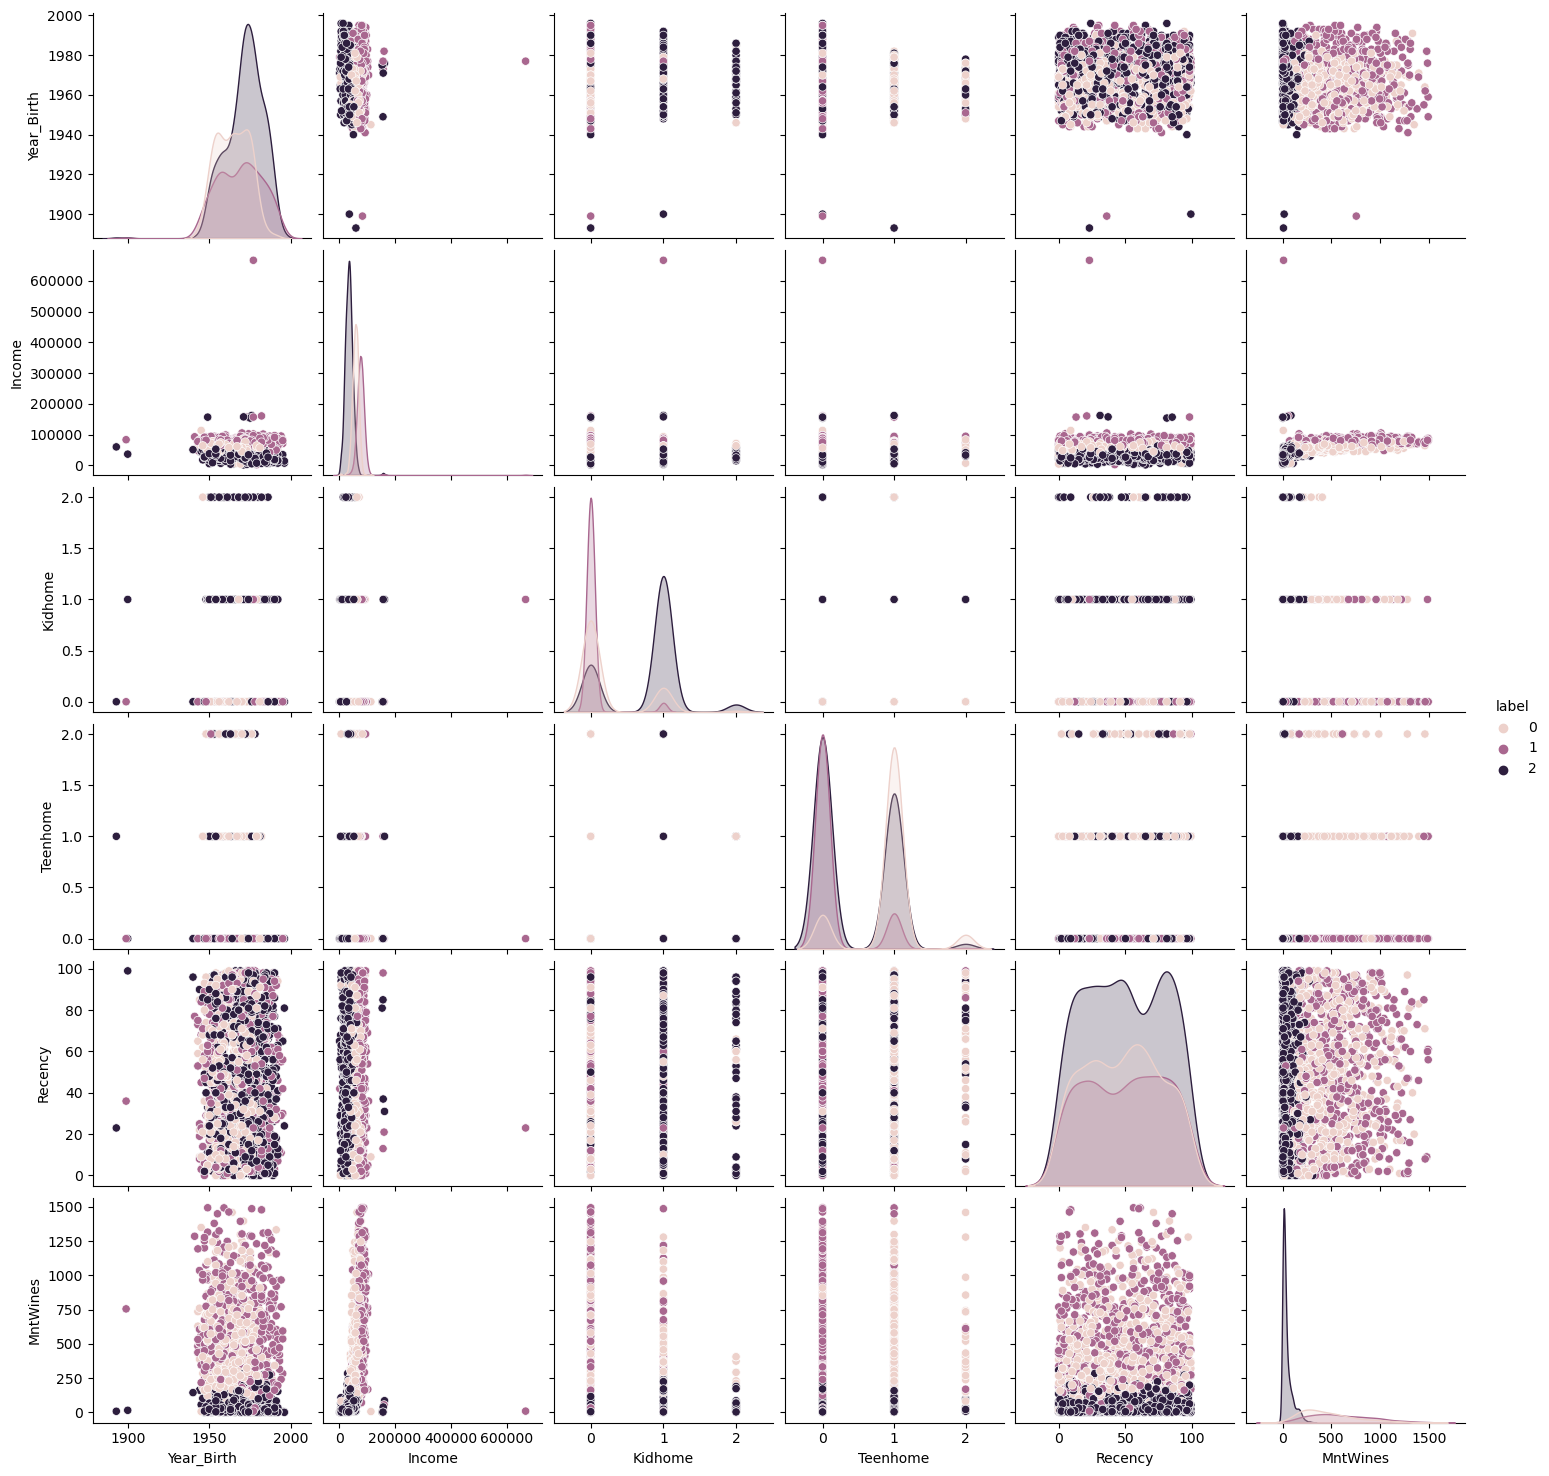

In [17]:
sns.pairplot(data=df[list(df.columns[1:10]) + ['label']], hue='label')

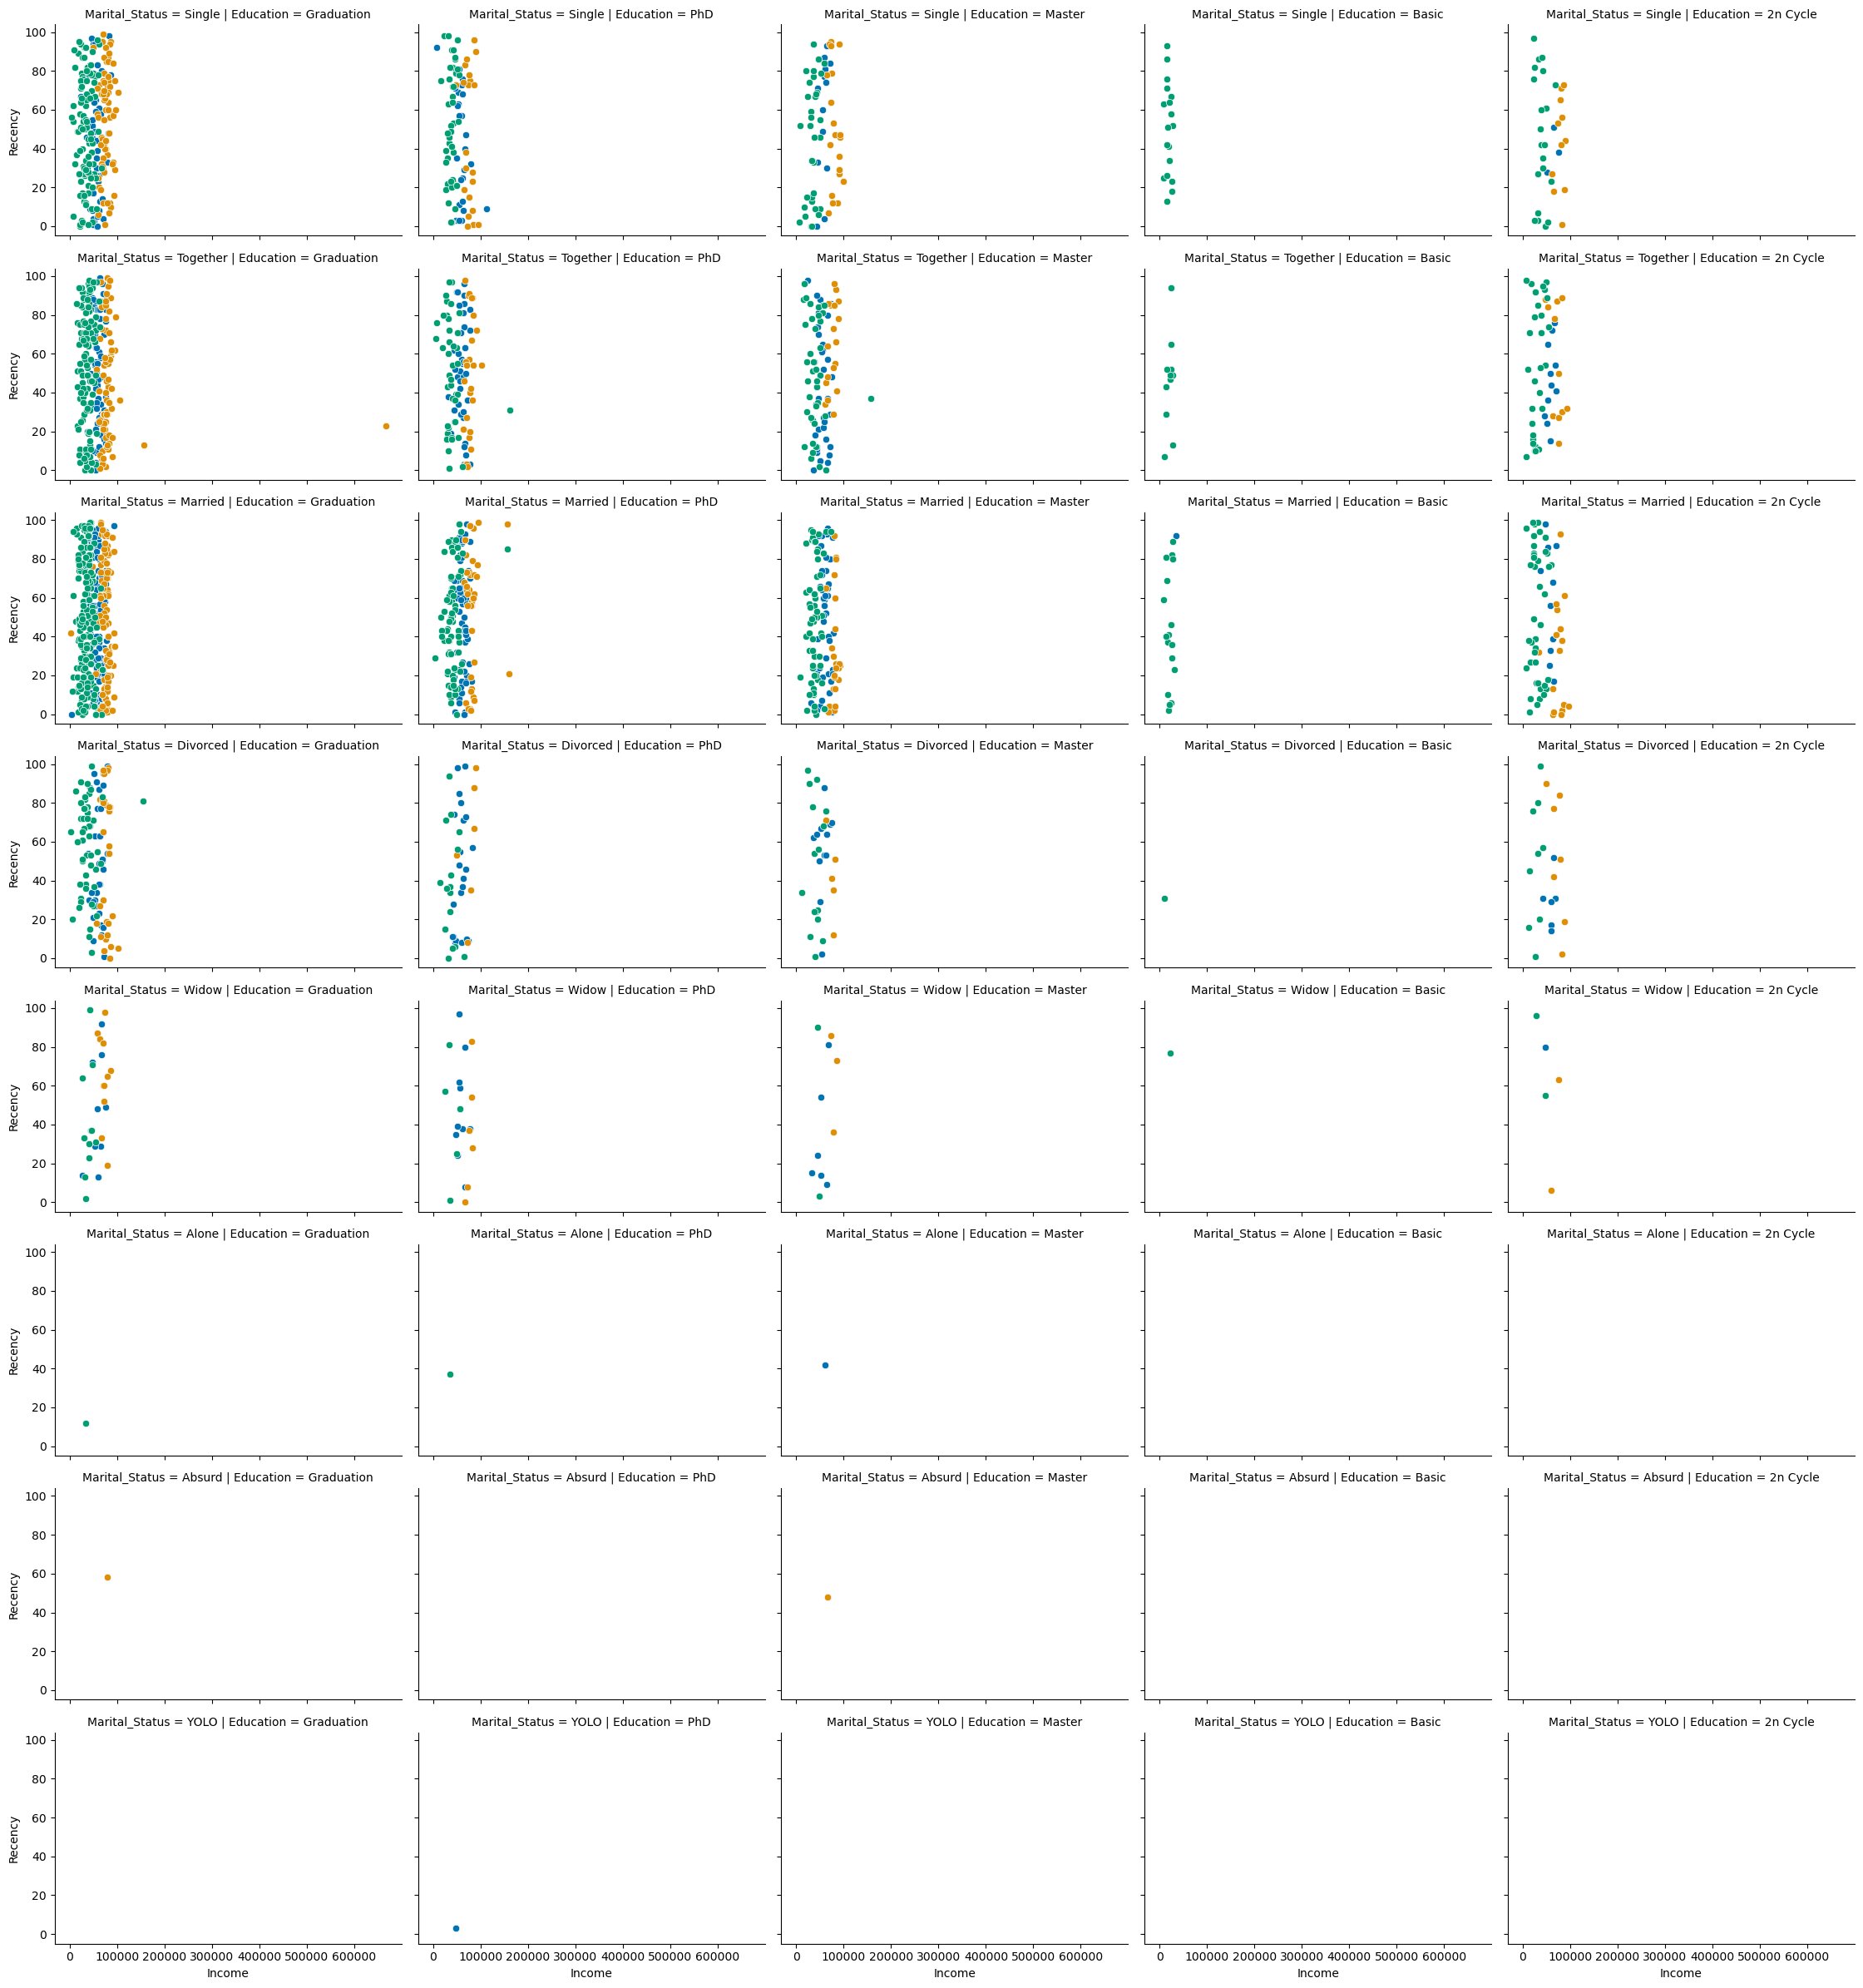

In [37]:
fc = sns.FacetGrid(data=df, hue='label', row='Marital_Status', col='Education', aspect=1.5)
gs = fc.map(sns.scatterplot, 'Income', 'Recency')

<AxesSubplot: xlabel='label', ylabel='count'>

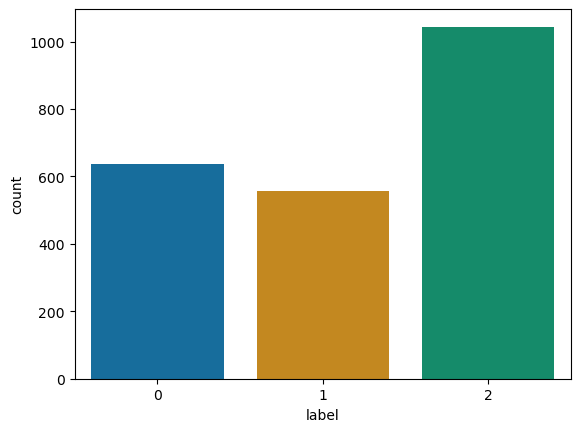

In [ ]:
sns.countplot(data=df, x='label')